# Year 2023 Day 19

[--- Day 19: Aplenty ---](https://adventofcode.com/2023/day/19)


The goal of this notebook is multiple:

1. Learn how to use use Sankey diagrams with `plotly`
2. Visualize the problem's input
3. Describe the problem solving procedure


In [1]:
import json

from IPython.display import Markdown as md

from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.visualization.plotly_tools import (
    ValuedLink,
    build_sankey_figure,
    to_plotly_sankey_input,
)
from advent_of_code.y_2023.problem_202319 import (
    AdventOfCodeProblem202319,
    PartRatingRange,
    PartRatingRangeTree,
    construct_initial_part_range,
)

In [2]:
from advent_of_code.visualization.notebooks import attempt_interactive


attempt_interactive(True, "plotly")

Plotly will render to pio.renderers.default='svg'


In [3]:
def pretty_print_dict_with_json(json_string: str) -> md:
    json_repr = json.dumps(json_string, indent=4)
    return md(
        f"""
```json
{json_repr} 
```
"""
    )

## Make a Sankey Diagram with Plotly

First, let's start with the example provided in
[Plotly: Sankey Diagram](https://plotly.com/python/sankey-diagram/).

Then, the goal is to adapt the in-memory representation of the problem's data into something that Plotly can understand and plot.

First, a builder can be made for those Plotly diagrams, then, an object converter to convert the in-memory representation of the problem's data into this intermediate data structure.

One challenge will be to flatten the tree structure to a list of weighted edges (flat graph representation).

The `source, target, value` expected by plotly indicates the need to flatten any tree structure.

In the following, the word "link" means a graph's directional edge/vertex


PlotlySankeyInput(labels=['a', 'b', 'c', 'z'], sources=[0, 1, 0, 3], targets=[1, 2, 2, 2], values=[2, 5, 4, 1], node_colors=['rgb(93, 105, 192)', 'rgb(199, 99, 233)', 'rgb(88, 5, 173)', 'rgb(46, 212, 149)'], link_colors=['rgba(93, 105, 192, 0.3)', 'rgba(199, 99, 233, 0.3)', 'rgba(88, 5, 173, 0.3)', 'rgba(46, 212, 149, 0.3)'])

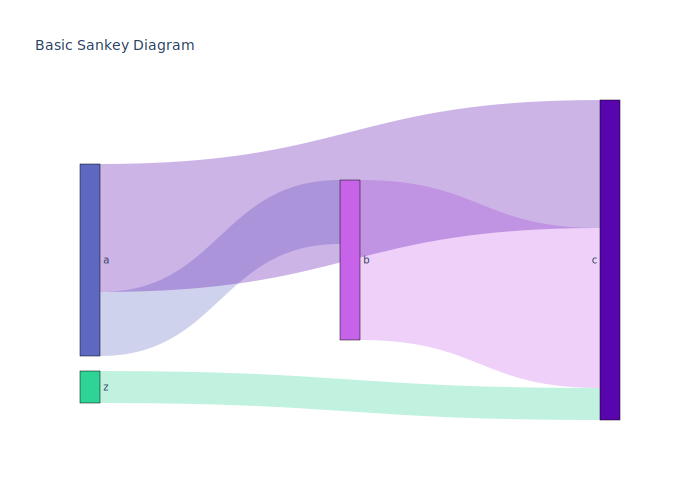

In [4]:
valued_links = [
    ValuedLink("a", "b", 2),
    ValuedLink("b", "c", 5),
    ValuedLink("a", "c", 4),
    ValuedLink("z", "c", 1),
]

sankey_input = to_plotly_sankey_input(valued_links)
display(sankey_input)
fig = build_sankey_figure(sankey_input)
fig

## Adapt the problem's data structure to feed it to Plotly

In [5]:
problem = AdventOfCodeProblem202319()
problem

AdventOfCodeProblem202319(year=2023, day=19)

In [6]:
example_input = get_example_inputs_file_contents(2023)["test_problem_202319"][
    "EXAMPLE_INPUT"
]

In [7]:
puzzle_input = problem.parse_text_input(example_input)
puzzle_input.workflows

{'px': Workflow(name='px', rules=(Rule(category='a', operator='<', rating=2006, destination_workflow='qkq'), Rule(category='m', operator='>', rating=2090, destination_workflow='A')), destination_workflow_else='rfg'),
 'pv': Workflow(name='pv', rules=(Rule(category='a', operator='>', rating=1716, destination_workflow='R'),), destination_workflow_else='A'),
 'lnx': Workflow(name='lnx', rules=(Rule(category='m', operator='>', rating=1548, destination_workflow='A'),), destination_workflow_else='A'),
 'rfg': Workflow(name='rfg', rules=(Rule(category='s', operator='<', rating=537, destination_workflow='gd'), Rule(category='x', operator='>', rating=2440, destination_workflow='R')), destination_workflow_else='A'),
 'qs': Workflow(name='qs', rules=(Rule(category='s', operator='>', rating=3448, destination_workflow='A'),), destination_workflow_else='lnx'),
 'qkq': Workflow(name='qkq', rules=(Rule(category='x', operator='<', rating=1416, destination_workflow='A'),), destination_workflow_else='crn

In [8]:
initial_part_rating_range = construct_initial_part_range()
initial_part_rating_range

PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 4001), s=range(1, 4001))

In [9]:
range_tree = puzzle_input.apply_to_range(initial_part_rating_range)
range_tree

PartRatingRangeTree(mapping=defaultdict(<class 'list'>, {'px': [PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 4001), s=range(1, 1351))], 'qqz': [PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 4001), s=range(1351, 4001))]}), children={'px': [PartRatingRangeTree(mapping=defaultdict(<class 'list'>, {'qkq': [PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 2006), s=range(1, 1351))], 'A': [PartRatingRange(x=range(1, 4001), m=range(2091, 4001), a=range(2006, 4001), s=range(1, 1351))], 'rfg': [PartRatingRange(x=range(1, 4001), m=range(1, 2091), a=range(2006, 4001), s=range(1, 1351))]}), children={'qkq': [PartRatingRangeTree(mapping=defaultdict(<class 'list'>, {'A': [PartRatingRange(x=range(1, 1416), m=range(1, 4001), a=range(1, 2006), s=range(1, 1351))], 'crn': [PartRatingRange(x=range(1416, 4001), m=range(1, 4001), a=range(1, 2006), s=range(1, 1351))]}), children={'A': [], 'crn': [PartRatingRangeTree(mapping=defaultdict(<class 'list'>, {'A': [Pa

In [10]:
for label, rating_range_list in range_tree.mapping.items():
    print(label, rating_range_list)

px [PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 4001), s=range(1, 1351))]
qqz [PartRatingRange(x=range(1, 4001), m=range(1, 4001), a=range(1, 4001), s=range(1351, 4001))]


In [11]:
from dataclasses import asdict

json_txt = json.dumps(asdict(range_tree), indent=4, default=str)
json_dict = json.loads(json_txt)
# Path("202319.out.json").write_text(json_repr)

Issue: how to find a good way to get a scalar from the "PartTreeRange" objects?
The cubes are 4D, composed of 4 components x, m, a, s.

Example: The flow coming from `rfg` must be split in three, to `gd`, `R` and `A`, with a metric that correctly reflect the proportion of parts flowing.


In [12]:
pretty_print_dict_with_json(
    json_dict["children"]["px"][0]["children"]["rfg"][0]["mapping"]
)


```json
{
    "gd": [
        {
            "x": "range(1, 4001)",
            "m": "range(1, 2091)",
            "a": "range(2006, 4001)",
            "s": "range(1, 537)"
        }
    ],
    "R": [
        {
            "x": "range(2441, 4001)",
            "m": "range(1, 2091)",
            "a": "range(2006, 4001)",
            "s": "range(537, 1351)"
        }
    ],
    "A": [
        {
            "x": "range(1, 2441)",
            "m": "range(1, 2091)",
            "a": "range(2006, 4001)",
            "s": "range(537, 1351)"
        }
    ]
} 
```


A first approach is just to compute the volume of the contiguous cubic sub-space delimitated of the $4000^4$ space formed by the dimensions (x, m, a, s).
Luckily, `plotly` will automatically normalize all the weights associated to edges going into the same node, concretely, incoming flows of `(6, 4, 10)` will visually respectively contribute to 30%, 20%, 50%.


In [13]:
{
    child: rating_ranges[0].volume()
    for child, rating_ranges in range_tree.children["px"][0]
    .children["rfg"][0]
    .mapping.items()
}

{'gd': 8939515200000, 'R': 5294661372000, 'A': 8281393428000}

But what to do in case of split flows, when a workflow has multiple subspaces (list of `PartRatingRange` has more than one element)?

Example:


In [14]:
pretty_print_dict_with_json(
    json_dict["children"]["px"][0]["children"]["rfg"][0]["children"]["gd"][0]
)


```json
{
    "mapping": {
        "R": [
            {
                "x": "range(1, 4001)",
                "m": "range(1, 2091)",
                "a": "range(3334, 4001)",
                "s": "range(1, 537)"
            },
            {
                "x": "range(1, 4001)",
                "m": "range(1, 2091)",
                "a": "range(2006, 3334)",
                "s": "range(1, 537)"
            }
        ]
    },
    "children": {
        "R": []
    }
} 
```


In that case, just add the individual contribution. The subspace associated to the workflow is just non contiguous, composed of several cubes.


In [15]:
def compute_flow_values(
    mapping: dict[str, list[PartRatingRange]],
) -> dict[str, tuple[int, ...]]:
    return {
        child: tuple(rating_range.volume() for rating_range in rating_ranges)
        for child, rating_ranges in mapping.items()
    }

In [16]:
compute_flow_values(range_tree.children["px"][0].children["rfg"][0].mapping)

{'gd': (8939515200000,), 'R': (5294661372000,), 'A': (8281393428000,)}

In [17]:
compute_flow_values(
    range_tree.children["px"][0].children["rfg"][0].children["gd"][0].mapping
)

{'R': (2988800320000, 5950714880000)}

Now, that the structure can be converted to a tree with integer leaves (the volumes), the Sankey Diagram can be dealt, by iterating depth-first into the `PartRatingRangeTree` structure, and filling a list of `ValuedLink`.


In [18]:
def to_valued_links(
    tree: PartRatingRangeTree,
    source: str,
    valued_links: list[ValuedLink],
    *,
    sum_flows: bool = False,
) -> None:
    flow_values = compute_flow_values(tree.mapping)
    if sum_flows:
        flow_total_values = {k: sum(v) for k, v in flow_values.items()}
        for target, value in flow_total_values.items():
            valued_links.append(ValuedLink(source, target, value))
    else:
        # More details as multiple flows from same source and target are showed explicitly
        # instead of merged. For the example data, this shows for the two links from lnx to A.
        for target, values in flow_values.items():
            for value in values:
                valued_links.append(ValuedLink(source, target, value))

    children = tree.children

    if children is not None:
        for child_label, child_trees in children.items():
            for child_tree in child_trees:
                to_valued_links(child_tree, child_label, valued_links)

In [19]:
valued_links = []
to_valued_links(range_tree, "in", valued_links)
valued_links

[ValuedLink(source='in', target='px', value=86400000000000),
 ValuedLink(source='in', target='qqz', value=169600000000000),
 ValuedLink(source='px', target='qkq', value=43308000000000),
 ValuedLink(source='px', target='A', value=20576430000000),
 ValuedLink(source='px', target='rfg', value=22515570000000),
 ValuedLink(source='qkq', target='A', value=15320205000000),
 ValuedLink(source='qkq', target='crn', value=27987795000000),
 ValuedLink(source='crn', target='A', value=14486526000000),
 ValuedLink(source='crn', target='R', value=13501269000000),
 ValuedLink(source='rfg', target='gd', value=8939515200000),
 ValuedLink(source='rfg', target='R', value=5294661372000),
 ValuedLink(source='rfg', target='A', value=8281393428000),
 ValuedLink(source='gd', target='R', value=2988800320000),
 ValuedLink(source='gd', target='R', value=5950714880000),
 ValuedLink(source='qqz', target='qs', value=78720000000000),
 ValuedLink(source='qqz', target='hdj', value=40896000000000),
 ValuedLink(source='qq

Now that we have got a list of `ValuedLink`, the same conversion function used earlier can be used to feed it into Plotly!


PlotlySankeyInput(labels=['in', 'px', 'qqz', 'qkq', 'A', 'rfg', 'crn', 'R', 'gd', 'qs', 'hdj', 'lnx', 'pv'], sources=[0, 0, 1, 1, 1, 3, 3, 6, 6, 5, 5, 5, 8, 8, 2, 2, 2, 9, 9, 11, 11, 10, 10, 12, 12], targets=[1, 2, 3, 4, 5, 4, 6, 4, 7, 8, 7, 4, 7, 7, 9, 10, 7, 4, 11, 4, 4, 4, 12, 7, 4], values=[86400000000000, 169600000000000, 43308000000000, 20576430000000, 22515570000000, 15320205000000, 27987795000000, 14486526000000, 13501269000000, 8939515200000, 5294661372000, 8281393428000, 2988800320000, 5950714880000, 78720000000000, 40896000000000, 49984000000000, 35328000000000, 43392000000000, 26599296000000, 16792704000000, 21856640000000, 19039360000000, 10871474560000, 8167885440000], node_colors=['rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(0,255,0,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(255,0,0,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rgba(128,128,128,0.3)', 'rg

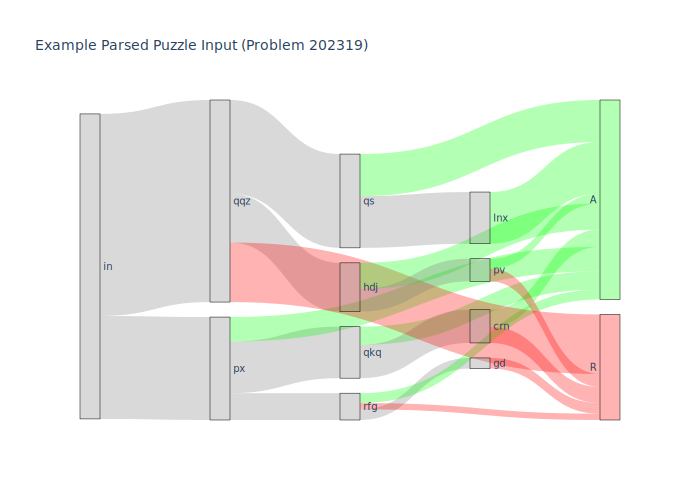

In [20]:
def show_example_input():
    sankey_input = to_plotly_sankey_input(valued_links, color_mode="problem_202319")
    display(sankey_input)
    fig = build_sankey_figure(
        sankey_input, title="Example Parsed Puzzle Input (Problem 202319)"
    )
    fig.show()


show_example_input()

The result looks similar to this post on Reddit: [\[2023 Day 19 (part 2)\] Sankey diagrams are cool](https://www.reddit.com/r/adventofcode/comments/18lyvuv/2023_day_19_part_2_sankey_diagrams_are_cool/)


Now let's try with my actual personalized input:


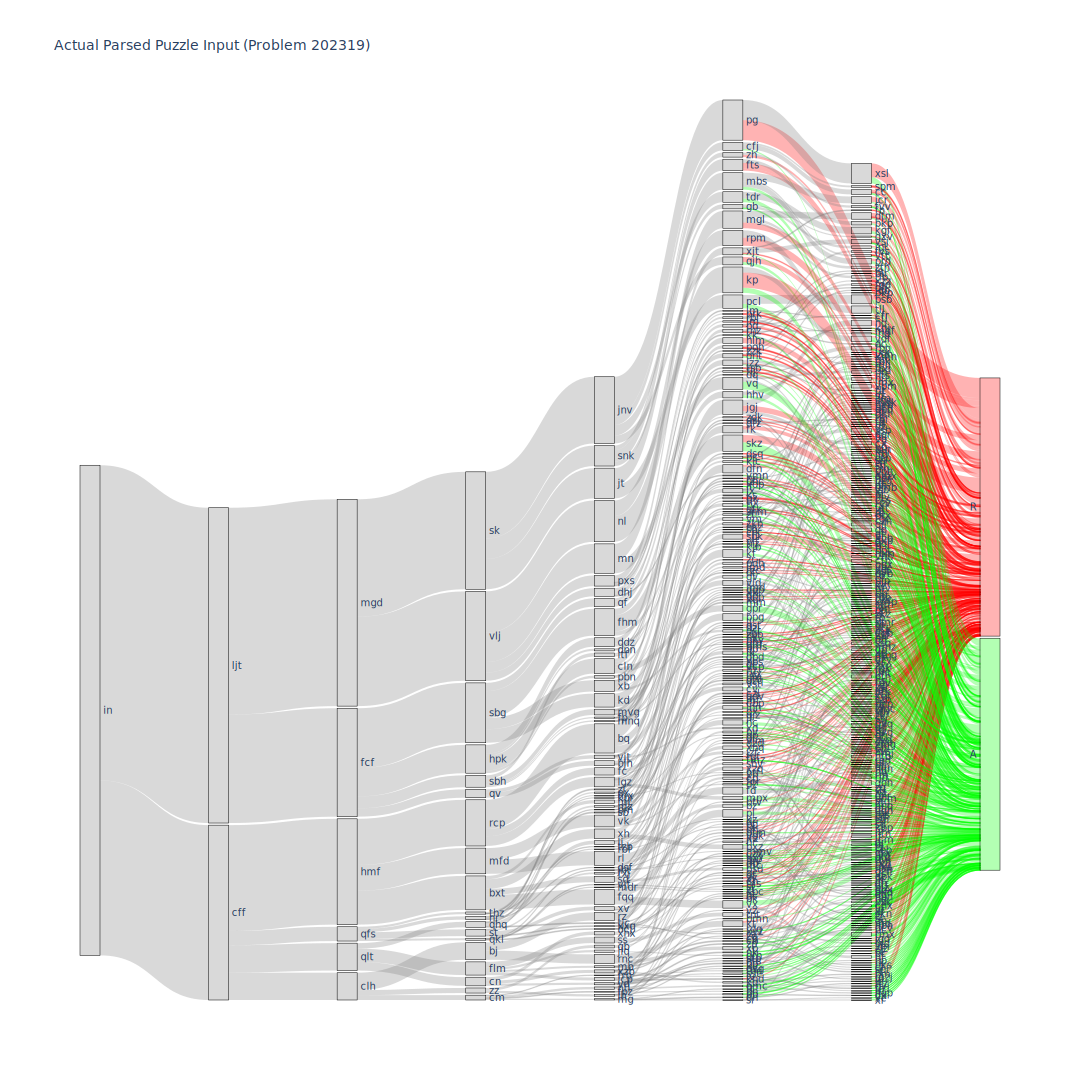

In [21]:
def show_actual_input():
    actual_input = problem.parse_input_text_file()

    initial_part_rating_range = construct_initial_part_range()
    actual_range_tree = actual_input.apply_to_range(initial_part_rating_range)

    valued_links = []
    to_valued_links(actual_range_tree, "in", valued_links)

    sankey_input = to_plotly_sankey_input(valued_links, color_mode="problem_202319")
    fig = build_sankey_figure(
        sankey_input, title="Actual Parsed Puzzle Input (Problem 202319)"
    )
    fig.show(width=1080, height=1080)


show_actual_input()

## Open Points


In all cases, the projection from a 4D subspace associated to a workflow, composed of one or more small cubes, leads to a loss of "complexity" in the visual representation. Only a 1D metric is used to represent the workflow contributions.

Representing the subspaces would be another challenge in its own. At first, making a version of the code that only sort pieces according to 2 dimensions would help to visualize. For that, some dimensions can be fixed (slicing the 4D cube into 2D). It would be interesting to build such a datacube with `xarray` ; it would have 4 dimensions: `dims = ('x', 'm', 'a', 's')` and a shape of `(4000, 4000, 4000, 4000)`. Slicing it would be easy, eg `xda.isel(a=0, s=0)`.
Since the array would be large, only portions of it could be computed. How to parallelize the algorithm, allowing it to be executed only on a sub-space, eg `(:200, :200, :200, :200)`? Is it possible?
